In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (1).csv


**This is a file where i am going to try and master exploratory data analysis
Now for achieving such mession , there is no general formula and something that works for everything , everything depends on the type of data we're handling and the task we're using this data for. However, there is 11 steps that seems to be necessary for all types of data , for EDA  in general**

1. Data Collection

The first step is to collect all relevant raw data for the project from various appropriate sources like databases, CSV files, APIs, web scraping etc. It is important to clearly understand the context and domain of the problem being addressed, the features available in the dataset, their expected formats and any other metadata provided to select only the necessary data.

In [ ]:
import pandas as pd

df = pd.read_csv("heart_disease_dataset.csv")
df.head(3)

#data successfully uploaded
#next , we're going to try to get the maximum of insight out of this data

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1


now let's get an idea about the columns and data in general

In [ ]:
df.info()
#verbose = False to not print the full summary , default is True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

we can see from the cell up that there a 1000 ligns in the data , all the colomuns have no null value except 'Alcohol Intake ' that has 340 null values.
also we have two types of columns only : object wich refers to strings or mixed types and int64 which refers to ints (64 bits)

In [ ]:
df.describe(include='all')

# we can include or exclude whatever type of data we want  , 'all' for all colums (all types)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
count,1000.000000,1000,1000.000000,1000.0000,1000.000000,1000,660,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,2,NaN,NaN,NaN,3,2,NaN,2,2,2,NaN,NaN,2,4,NaN
top,NaN,Female,NaN,NaN,NaN,Never,Heavy,NaN,No,Yes,No,NaN,NaN,No,Non-anginal Pain,NaN
freq,NaN,503,NaN,NaN,NaN,338,346,NaN,501,505,501,NaN,NaN,528,256,NaN
mean,52.293000,NaN,249.939000,135.2810,79.204000,NaN,NaN,4.529000,NaN,NaN,NaN,5.646000,134.941000,NaN,NaN,0.392000
std,15.727126,NaN,57.914673,26.3883,11.486092,NaN,NaN,2.934241,NaN,NaN,NaN,2.831024,36.699624,NaN,NaN,0.488441
min,25.000000,NaN,150.000000,90.0000,60.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,70.000000,NaN,NaN,0.000000
25%,39.000000,NaN,200.000000,112.7500,70.000000,NaN,NaN,2.000000,NaN,NaN,NaN,3.000000,104.000000,NaN,NaN,0.000000
50%,52.000000,NaN,248.000000,136.0000,79.000000,NaN,NaN,4.500000,NaN,NaN,NaN,6.000000,135.000000,NaN,NaN,0.000000
75%,66.000000,NaN,299.000000,159.0000,89.000000,NaN,NaN,7.000000,NaN,NaN,NaN,8.000000,167.000000,NaN,NaN,1.000000


In [ ]:
df.duplicated(subset=['Age', 'Heart Rate'])

#duplicated return a boolean serie , parameters : subset : list of columns we're interested in
# keep : default is 'first'.
#'first' means set the first occurrence to False, the rest to True. 'last' same thing but for last occurence
# False means set all occurrences to True.

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,True
996,False
997,False
998,False


In [ ]:
print("the number of duplicated lines is " , df.duplicated().sum())
#if some duplicated values were noticed , we would delete  while keeping the first occurence or last
#cz they would mess with the distributions

the number of duplicated lines is  0


Now the next step is **data wrangling**

Once the raw data is collected, it needs to be cleaned, organized and transformed into a format suitable for analysis. This involves tasks like removing duplicate records where the same data point is listed twice or more to avoid skewing results. Missing values are ubiquitous in real-world datasets and need handling either by removing cases with missing data or imputing substitute values.


Now , from what we've seen **there are no duplicates**
but the column **Alcohol Intake** has more than 330 missing values , now we can't just remove them because we'll be sacrificing almost 33% of the data

What we'll do is first find a way to complete this missing values and then question why is this much of data missing and is there any pattern behind it so we can fix the problem and not face it in the future and also get how to complete them

Matter of fact , there are three types of missing values and each one is treated differently **(MCAR/ MAR/ MNAR)**

Consider a variable X for which some data is missing. Here is the definition of three processes for generating missing data.

The missing data of X are said to be missing completely at random **(MCAR)** if the probability that the value of X is missing depends neither on the value of X (which is not observed) nor on the values of other variables.
The assumption that the missing data are completely random is generally considered too restrictive

The missing data of X are said to be missing at random **(MAR)** if the probability that the value of X is missing does not depend on the value of X (which is not observed) once we have controlled for the other variables.

The missing data of X are said to be missing not at random **(MNAR)** if the probability that the value of X is missing depends on the value of X itself. For example, people with high incomes might be more reluctant to answer a question about their income.

**Little's MCAR test** can help you determine if the missing data in your dataset is completely random. If the test suggests that the data is not MCAR, then you must decide between MAR and MNAR, but distinguishing between these two directly using a statistical test is more challenging.
There are also different statistical methodes to fill (in case we didn,'t decide to remove) the missing values depending on the type of missing values (numerical , categorical ... ) and which case we're dealing with mcar, mar , mnar ... ( but I won't dive into them)
since R test are not predefined here in python

In [ ]:
df['Alcohol Intake'].unique()

array(['Heavy', nan, 'Moderate'], dtype=object)

As we can see the values that 'Alcohol intake' are Heavy and Moderate only , so i'm making the hypothesis that this is a MNAR case where the person charged of filling the formular has only the two options ,  As a result the prople that doesn't drink or take alcohol less than one drink (for women) or two (for men ) per day can't choose neither options and thus the Nan presence
We'll replace nan by 'Low o

In [ ]:
df['Alcohol Intake']= df['Alcohol Intake'].fillna('Rare or never')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           1000 non-null   object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

Now that we dealed with the missing values ,  it's crucial to understand the distributions and characteristics of each variable: **Univariate Analysis**

In [ ]:
import matplotlib .pyplot as plt
def draw_hist ( colonne , figsize  ,  color='red' , bins =10 , edge_color='black' , xlabel= None , ylabel = "Frequency"  , title = None) :
  plt.figure(figsize=figsize)
  plt.hist(df[colonne] , bins = bins , color = color , edgecolor= edge_color)
  if xlabel:
    plt.xlabel(xlabel)
  if title :
    plt.title(title)
  plt.ylabel(ylabel)
  plt.show()


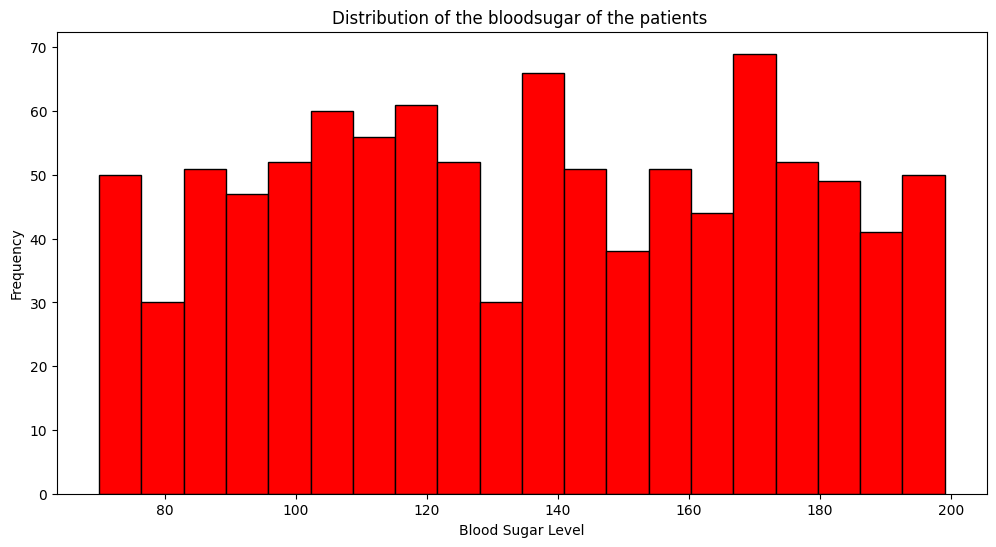

In [ ]:
draw_hist(colonne='Blood Sugar' , bins = 20 , figsize=(12,6) , xlabel='Blood Sugar Level'  , title = 'Distribution of the bloodsugar of the patients ')

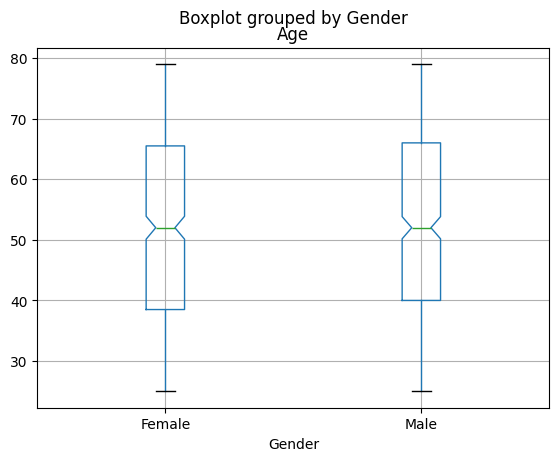

In [ ]:
boxplot = df.boxplot(column=['Age'], by='Gender' , notch = True , whis = 1.5)
#whis for whisker Q3+whis*IQR

Box:

    The central box of the box plot represents the interquartile range (IQR), which is the middle 50% of the data. It extends from the 25th percentile (Q1, first quartile) to the 75th percentile (Q3, third quartile) of the dataset.

Whiskers:

    The lines (or "whiskers") that extend from the top and bottom of the box indicate the extent of the rest of the data, excluding outliers.
    Typically, the whiskers extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles, respectively. This distance is often calculated as:
        Lower whisker: Q1 - 1.5 * IQR
        Upper whisker: Q3 + 1.5 * IQR
    Data points beyond the end of the whiskers are often considered outliers and can be plotted as individual points.

Median Line:

    Inside the box, there is usually a line that indicates the median (50th percentile) of the data. This line gives a sense of where the middle of the data distribution lies.

Outliers:

    Points that fall outside the whiskers are typically considered outliers and are often represented with dots, small circles, or other markers.

notch:

    Whether to draw a notched boxplot (True), or a rectangular boxplot (False). The notches represent the confidence interval (CI) around the median.

When a data distribution is symmetric, you can expect the median to be in the exact center of the box: the distance between Q1 and Q2 should be the same as between Q2 and Q3. Outliers should be evenly present on either side of the box.

 If a distribution is skewed, then the median will not be in the middle of the box, and instead off to the side. You may also find an imbalance in the whisker lengths, where one side is short with no outliers, and the other has a long tail with many more outliers.

In [ ]:
import seaborn as sns